# Purpose of Notebook
This Notebook outlines our benchmark agent:  
An agent, that takes a random action at every turn.

In [23]:
import sys 
sys.path.append('..') #hack to import module from parent folder
import numpy as np
from gym import logger, wrappers
import gym
import gym_drop7
import cfg
import argparse
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [24]:
class RandomAgent(object):
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

In [25]:
logger.set_level(logger.INFO)

In [26]:
env = gym.make('Drop7-v1')

outdir = './agent_logger_results/random'
env = wrappers.Monitor(env, directory=outdir, force=True)
# env.seed(0)
agent = RandomAgent(env.action_space)

INFO: Making new env: Drop7-v1
INFO: Clearing 4 monitor files from previous run (because force=True was provided)


In [27]:
episode_count = 500
reward = 0
done = False

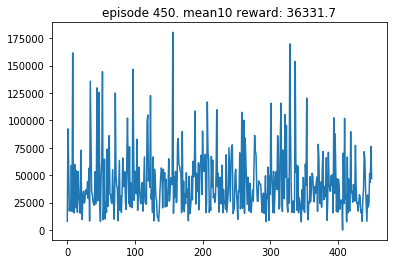

INFO: Finished writing results. You can upload them to the scoreboard via gym.upload('/Users/dave/Documents/Drop7Gym/notebooks/agent_logger_results/random')


In [28]:
all_rewards = []

for i in range(episode_count):
    episode_reward = 0
    env.reset()
    while True:
        action = agent.act(ob, reward, done)
        ob, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            all_rewards.append(episode_reward)
            env.reset()
            break
    if i % 50 == 0:
        clear_output(True)
        plt.title('episode %s. mean10 reward: %s' % (i, np.mean(all_rewards[-10:])))
        plt.plot(all_rewards)
        plt.show()
        
# Close the env and write monitor result info to disk
env.close()